In [1]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib.pyplot as plt

The following catalyzed gas phase reaction is studied in a packed bed reactor:
$$ A + 2B →C $$
The reaction is zero order with respect to $A$ and first order with respect to the partial pressure of $B$. The specific rate constant ($k$) at 170°C is given as 0.05 $ \frac{mol A}{kg.min.atmB}$. The total molar feed flow rate of is 40 $\frac{mol}{min}$ (33% $A$ and 67% $B$). The inlet pressure is 5 atm.

In [2]:
def ri(FB, FT, P):
    rAd = -k*(FB/FT)*P
    rBd = 2*rAd
    rCd = -rAd
    return [rAd, rBd, rCd]

# a) 
Neglecting pressure drop, obtain the concentration- and reaction rate profiles as
a function of catalyst mass. Give all the relevant values at a conversion of A of
50%.

In [3]:
# Parameters
FTo = 40 # mol/min
FAo = 0.33*FTo
FBo = 0.67*FTo
FCo = 0
k = 0.05
Po = 5*101325 # Pa
x = 0.5 

In [4]:
def DE1(W, var):
    FA, FB, FC = var
    FT = FA + FB + FC
    P = Po
    rAd, rBd, rCd = ri(FB, FT, P/101325)
    dFAdW = rAd
    dFBdW = rBd
    dFCdW = rCd
    return [dFAdW, dFBdW, dFCdW]

In [5]:
# Events
def DE1_50conv(W, var):
    FA, FB, FC = var
    return FA - FAo*(1-x)
xt = 0.99
def DE1_term(W, var):
    FA, FB, FC = var
    return FA - FAo*(1-xt)
DE1_term.terminal = True

In [6]:
Wbound = [0, 50]
init = np.array([FAo, FBo, FCo])
Que1 = scipy.integrate.solve_ivp(DE1, Wbound, init, dense_output=True, events=[DE1_50conv, DE1_term])

In [7]:
FA, FB, FC = Que1.y
W1 = Que1.t_events[0][0]
print(np.round(W1, 2), 'kg catalyst required to achieve 50 % Conversion')

44.31 kg catalyst required to achieve 50 % Conversion


In [8]:
Wvals = np.linspace(0, Wbound[1])
plotvals = Que1.sol(Wvals)
FA, FB, FC = plotvals

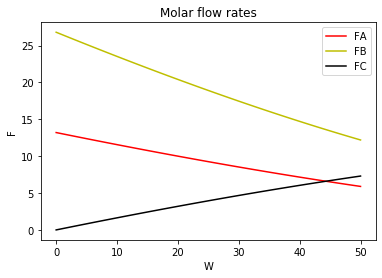

In [9]:
plt.figure(1)
plt.plot(Wvals, FA, 'r-', label='FA')
plt.plot(Wvals, FB, 'y-', label='FB')
plt.plot(Wvals, FC, 'k-', label='FC')
plt.xlabel('W')
plt.ylabel('F')
plt.legend(loc='best')
plt.title('Molar flow rates')
plt.show()

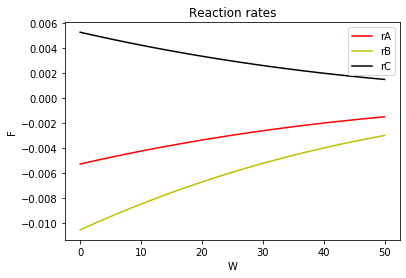

In [10]:
rates = ri(FA, Po/101.325, FA+FB+FC)
rAd, rBd, rCd = rates

plt.figure(3)
plt.plot(Wvals, rAd, 'r-', Wvals, rBd, 'y-', Wvals, rCd, 'k-')
plt.xlabel('W')
plt.ylabel('F')
plt.legend(loc='best', labels=['rA', 'rB', 'rC'])
plt.title('Reaction rates')
plt.show()

# b)
What is the effect of pressure drop on the results in (a). Plot the pressure drop
as a function of catalyst mass. How does the values compare at a conversion
(of A) of 50%? Explain the differences.

In [11]:
# Parameters
MMo = 30 # g/mol
por = 0.4
Dr = 0.085 # m
dp = 0.003 # m
mu = 2e-5 # kg/ms
rho_b = 1000 # kg/m3
R = 8.314 # kPa*l/mol.K
T = 170+273.15 # K

Ac = np.pi*(Dr/2)**2 # m^2
rho_o = (MMo*Po)/(R*T)/1000 # kg/m^3
Qo = (FTo*R*T)/(Po) # m^3/min
mdot = Qo*rho_o # kg/min
G = mdot/(Ac*60) # kg/m^2.s

K = G/(rho_o*dp)*((1-por)/(por**3))*((150*mu*(1-por)/dp) + (1.75*G))/(rho_b*Ac)

In [12]:
def DE2(W, var):
    FA, FB, FC, P = var
    FT = FA + FB + FC
    rAd, rBd, rCd = ri(FB, FT, P/101325)
    dFAdW = rAd
    dFBdW = rBd
    dFCdW = rCd
    dPdW = -K*(Po*FT)/(P*FTo)
    return [dFAdW, dFBdW, dFCdW, dPdW]

In [13]:
# Events
def DE2_50conv(W, var):
    FA, FB, FC, P = var
    return FA - FAo*(1-x)
xt = 0.99
def DE2_termx(W, var):
    FA, FB, FC, P = var
    return FA - FAo*(1-xt)
DE2_termx.terminal = True
def DE2_termp(W, var):
    FA, FB, FC, P = var
    return P
DE2_termp.terminal = True

In [14]:
Wbound = [0, 60]
init2 = np.array([FAo, FBo, FCo, Po])
Que2 = scipy.integrate.solve_ivp(DE2, Wbound, init2, dense_output=True, events=[DE2_50conv, DE2_termp, DE2_termx])

In [15]:
FA, FB, FC, P = Que2.y
W50 = Que2.t_events[0][0]
print(np.round(W50, 2), 'kg of Catalyst required')

52.9 kg of Catalyst required
